In [1]:
import os
import pandas as pd
from pathlib import Path
from torch.utils.data import Dataset, DataLoader, Subset
import torchvision.transforms as transforms
import albumentations as A
import numpy as np
import cv2
from sklearn.model_selection import KFold



image_folder = "../../APTOS/resized_train_15"  # Ensure this is correct
csv_file = "../../APTOS/labels/trainLabels15.csv"  # Ensure this exists

c:\Users\Amiroodi\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
df = pd.read_csv(csv_file)
df.iloc[:, 0]

0            10_left
1           10_right
2            13_left
3           13_right
4            15_left
            ...     
35121    44347_right
35122     44348_left
35123    44348_right
35124     44349_left
35125    44349_right
Name: image, Length: 35126, dtype: object

In [3]:
class LoadTrainDataset(Dataset):
    def __init__(self, image_folder, csv_file, transform=None):
        self.image_folder = image_folder
        self.df = pd.read_csv(csv_file) # Load the CSV file
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        # Get image filename and label from the DataFrame
        img_name = self.df.iloc[idx, 0]  # Assuming first column is filename
        label = self.df.iloc[idx, 1]  # Assuming second column is label (0-4)

        # Load image
        img_path = os.path.join(self.image_folder, img_name) + '.jpg'
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        if self.transform:
            image = self.transform(image=image)["image"]
        
        return image, label

In [41]:
train_dataset = LoadTrainDataset(image_folder, csv_file)
for i, item in train_dataset:
    print(item)

0
0
0
0
1
2
4
4
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
1
0
2
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
0
0
2
2
0
0
0
0
3
3
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
3
3
0
0
0
0
0
0
0
0
2
2
0
0
0
0
1
1
0
0
2
2
0
0
0
0
2
2
0
0
2
2
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
4
4
0
0
2
0
0
0
0
0
0
0
1
0
0
2
1
0
0
0
0
0
0
0
2
2
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
0
2
2
2
2
0
0
0
0
4
4
0
0
0
1
0
0
0
0
0
0
0
0
0
0
2
2
0
0
1
2
0
0
0
0
2
2
4
4
2
3
0
0
0
0
0
0
0
2
0
0
0
0
1
1
0
0
3
3
0
0
0
0
0
0
2
2
0
0
0
0
4
4
0
1
2
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
2
3
0
1
0
0
2
2
0
0
0
0
0
0
0
0
4
4
4
4
0
0
0
0
0
0
1
1
0
0
2
2
1
0
2
2
0
0
0
0
0
0
0
0
1
1
0
0
0
0
2
4
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
4
0
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
3
2
2
2
0
0
0
0
0
0
1
1
1
2
0
0
3
3
0
0
2
2
0
0
0
0
0
0
0
0
2
2
1
2
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
1
3
2
0
0


KeyboardInterrupt: 

In [5]:
train_dataset = LoadTrainDataset(image_folder, csv_file)
train_dataset[6][1]
print(len(train_dataset))

35126


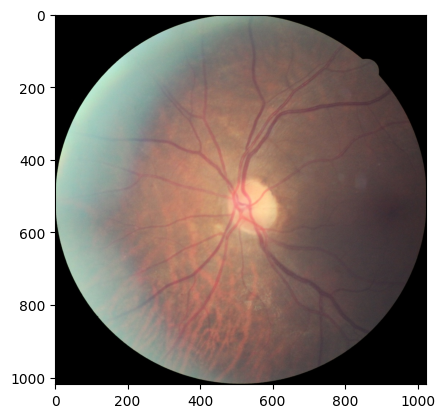

In [33]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset[0][0])

In [30]:
import os
import pandas as pd
from pathlib import Path
from torch.utils.data import Dataset, DataLoader, Subset
import torchvision.transforms as transforms
import albumentations as A
import numpy as np
import cv2
from sklearn.model_selection import KFold
from torch.utils.data import ConcatDataset


IDRID_image_folder = "../../IDRID/Imagenes/Imagenes" 
IDRID_csv_file = "../../IDRID/idrid_labels.csv"  

MESSIDOR_image_folder = "../../MESSIDOR/images"
MESSIDOR_csv_file = "../../MESSIDOR/messidor_data.csv"

APTOS_train_image_folder = "../../APTOS/resized_train_19"
APTOS_train_csv_file = "../../APTOS/labels/trainLabels19.csv"  

APTOS_test_image_folder = "../../APTOS/resized_test_15"
APTOS_test_csv_file = "../../APTOS/labels/testLabels15.csv"  

# NUM_WORKERS = os.cpu_count()
NUM_WORKERS = 0

class LoadDataset(Dataset):
    def __init__(self, image_folder, csv_file, transform=None):
        self.image_folder = image_folder
        self.df = pd.read_csv(csv_file) # Load the CSV file
        # self.df = self.df[~self.df.iloc[:, 0].str.contains("test", case=False, na=False)].reset_index(drop=True) 
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        # Get image filename and label from the DataFrame
        img_name = self.df.iloc[idx, 0]  # Assuming first column is filename
        label = self.df.iloc[idx, 1]  # Assuming second column is label (0-4)

        # Load image
        if self.image_folder == '../../MESSIDOR/images':
            img_path = os.path.join(self.image_folder, img_name)
        else:
            img_path = os.path.join(self.image_folder, img_name) + '.jpg'
        print(img_path)
        image = cv2.imread(img_path)
        if image is None:
            print('NONEEEEE')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        if self.transform:
            image = self.transform(image=image)["image"]
            
        return image, label

In [31]:
combined_dataset = LoadDataset(MESSIDOR_image_folder, MESSIDOR_csv_file, transform=None)
combined_dataset[0][1]

../../MESSIDOR/images\20051020_43808_0100_PP.png


np.int64(0)

In [32]:
import torch

In [33]:
def onehot_to_cumulative(one_hot):
    # Get the class index (e.g., 3 from [0, 0, 0, 1, 0])
    class_idx = one_hot.argmax(dim=1)  # shape [N]
    
    # Create a cumulative tensor of 1s up to the class index
    N, C = one_hot.shape
    cumulative = torch.zeros_like(one_hot)

    for i in range(N):
        cumulative[i, :class_idx[i]+1] = 1

    return cumulative

In [34]:
t = torch.tensor([[0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]])

In [35]:
onehot_to_cumulative(t)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.]])

In [36]:
def ordinal_labels(y, num_classes):
    """Convert labels to cumulative one-hot encoding"""
    y_cumulative = torch.zeros(len(y), num_classes)
    for i in range(num_classes):
        y_cumulative[:, i] = (y >= i).float()
    return y_cumulative

In [38]:
t = torch.tensor([3, 2, 4, 4, 3, 4, 4, 2, 2, 2, 4, 4, 3, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 3,
        2, 3, 2, 3, 2, 2, 4, 3])
ordinal_labels(t, 5)

tensor([[1., 1., 1., 1., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.]])

In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        # pt = torch.exp(-ce_loss)
        # loss = (self.alpha[targets] * (1 - pt) ** self.gamma * ce_loss).mean()
        loss = ce_loss
        return loss

In [88]:
loss_fn = FocalLoss()
t1 = torch.tensor([[3, 10, 4, -3, -5], [-5, -5, 2, 10, 4]]).float()
t2 = torch.tensor([[0, 1, 0, 0, 0], [0, 0, 1, 0, 0]]).float()

t1 = torch.tensor([[3, 10, 4, -3, -5], [-5, -5, 2, 10, 4]]).float()
t2 = torch.tensor([1, 3])
# t2 = torch.tensor([[0, 1, 0, 0, 0], [0, 0, 0, 0, 1]]).float()
loss_fn(t1, t2)

tensor([0.0034, 0.0028])

In [72]:
loss_fn = nn.BCEWithLogitsLoss()
loss_fn(t1, t2)

tensor(2.1281)

In [73]:
loss_fn = nn.CrossEntropyLoss(reduction='none')
loss_fn(t1, t2)

tensor([3.3874e-03, 8.0028e+00])

In [67]:
torch.softmax(torch.tensor([[3, 10, 4, -3, -5], [-5, -5, 2, 10, 4]]).float(), dim=1)

tensor([[9.0880e-04, 9.9662e-01, 2.4704e-03, 2.2527e-06, 3.0487e-07],
        [3.0504e-07, 3.0504e-07, 3.3452e-04, 9.9719e-01, 2.4718e-03]])

In [54]:
t1 = torch.tensor([3]).float()
t2 = torch.tensor([0]).float()
loss_fn(t1, t2)

tensor(-0.)

In [30]:
sig = torch.softmax(t1, dim=1)
sig

tensor([[9.0880e-04, 9.9662e-01, 2.4704e-03, 2.2527e-06, 3.0487e-07],
        [3.0504e-07, 3.0504e-07, 3.3452e-04, 9.9719e-01, 2.4718e-03]])

In [31]:
log = torch.log(sig)
log

tensor([[-7.0034e+00, -3.3874e-03, -6.0034e+00, -1.3003e+01, -1.5003e+01],
        [-1.5003e+01, -1.5003e+01, -8.0028e+00, -2.8108e-03, -6.0028e+00]])

In [32]:
-log * t2

tensor([[0.0000e+00, 3.3874e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 8.0028e+00, 0.0000e+00, 0.0000e+00]])

TypeError: log(): argument 'input' (position 1) must be Tensor, not int

In [103]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        loss = (self.alpha * (1 - pt) ** self.gamma * ce_loss).mean()
        return loss

In [104]:
t1 = torch.tensor([[-2, 1, 7, 2, -4], [7, 4, 2, -2, -4]]).float()
t2= torch.tensor([[0, 1, 0, 0, 0], [0, 0, 1, 0, 0]]).float()

In [105]:
fn = FocalLoss(alpha=2, gamma=2)
fn(t1, t2)

tensor(10.9707)

In [106]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        loss = (self.alpha * (1 - pt) ** self.gamma * ce_loss).mean()
        return loss

In [111]:
t1 = torch.tensor([[-2, 1, 7, 2, -4], [7, 4, 2, -2, -4]]).float()
t2= torch.tensor([[1, 1, 0, 0, 0], [0, 1, 1, 0, 0]]).float()

In [112]:
fn = FocalLoss(alpha=2, gamma=2)
fn(t1, t2)

tensor(3.4606)

In [115]:
from torchmetrics.classification import MulticlassF1Score
import torch

num_classes = 5  # set this to your number of classes
f1 = MulticlassF1Score(num_classes=num_classes, average='macro')  # 'macro', 'micro', or 'weighted'

# During evaluation:
preds = torch.tensor([0, 1, 1, 2, 4, 3, 2, 2])
targets = torch.tensor([0, 1, 1, 2, 4, 3, 2, 2])

# targets = torch.tensor([0, 0, 1, 2, 3, 2, 2, 1])
# pred_labels = torch.argmax(preds, dim=1)  # assuming model outputs logits
f1_score = f1(preds, targets)
print(f"F1 Score: {f1_score.item():.4f}")


F1 Score: 1.0000


In [116]:
t = torch.tensor([1, 1, 2, 2, 0])
t[t > 1] = 1
t

tensor([1, 1, 1, 1, 0])

In [117]:
a = [1, 2, 3]
vm, bv, sc = a

C:\Users\Amiroodi\AppData\Local\Temp\ipykernel_9136\2540944990.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 5)  # 5 discrete colors


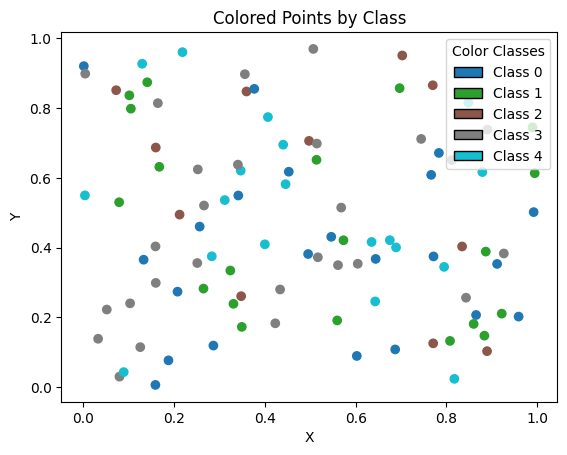

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample vectors
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.randint(0, 5, size=100)  # integers between 0 and 4

# Create a colormap
cmap = plt.cm.get_cmap('tab10', 5)  # 5 discrete colors

# Plot with color mapping
scatter = plt.scatter(x, y, c=colors, cmap=cmap)

# Create a custom legend
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor=cmap(i), edgecolor='black', label=f'Class {i}') for i in range(5)
]

plt.legend(handles=legend_elements, title="Color Classes", loc='upper right')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Colored Points by Class")

plt.show()


C:\Users\Amiroodi\AppData\Local\Temp\ipykernel_9136\2404406870.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 5)


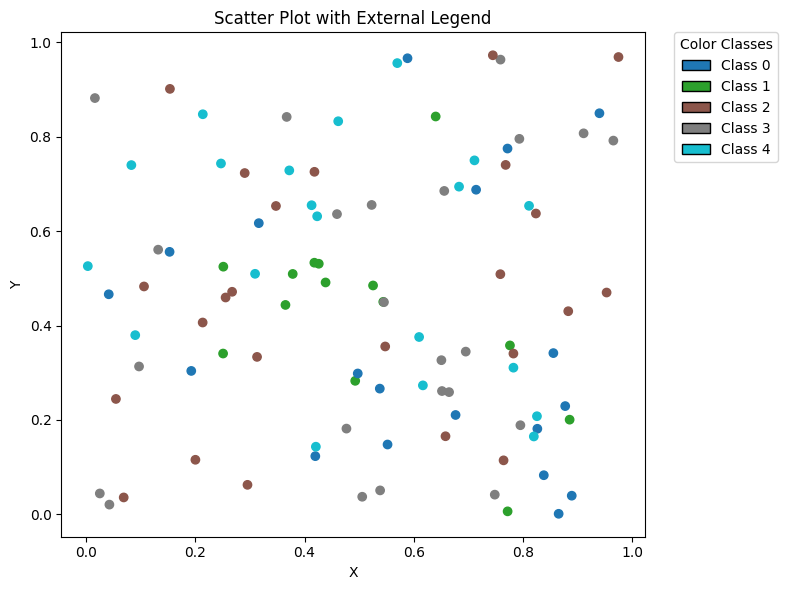

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sample data
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.randint(0, 5, size=100)

# Create colormap
cmap = plt.cm.get_cmap('tab10', 5)

# Plot scatter
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=colors, cmap=cmap)

# Custom legend patches
legend_elements = [
    Patch(facecolor=cmap(i), edgecolor='black', label=f'Class {i}') for i in range(5)
]

# Add legend *outside* top-right
plt.legend(
    handles=legend_elements,
    title="Color Classes",
    loc='upper left',
    bbox_to_anchor=(1.05, 1),  # Shift legend outside plot
    borderaxespad=0.
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with External Legend")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [7]:
np.random.randint(0, 5, size=100)

array([1, 0, 2, 2, 4, 1, 3, 3, 0, 1, 3, 2, 2, 2, 2, 0, 4, 0, 1, 1, 2, 4,
       2, 1, 4, 2, 1, 4, 0, 0, 3, 0, 3, 2, 1, 1, 0, 3, 1, 1, 0, 1, 4, 3,
       3, 3, 3, 2, 4, 1, 4, 3, 0, 2, 2, 2, 3, 2, 1, 1, 1, 0, 0, 1, 0, 3,
       0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1, 3, 0, 3, 2, 2, 3, 3, 2, 4,
       2, 4, 1, 3, 3, 3, 3, 4, 0, 4, 3, 1], dtype=int32)

C:\Users\Amiroodi\AppData\Local\Temp\ipykernel_9136\171700481.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 5)


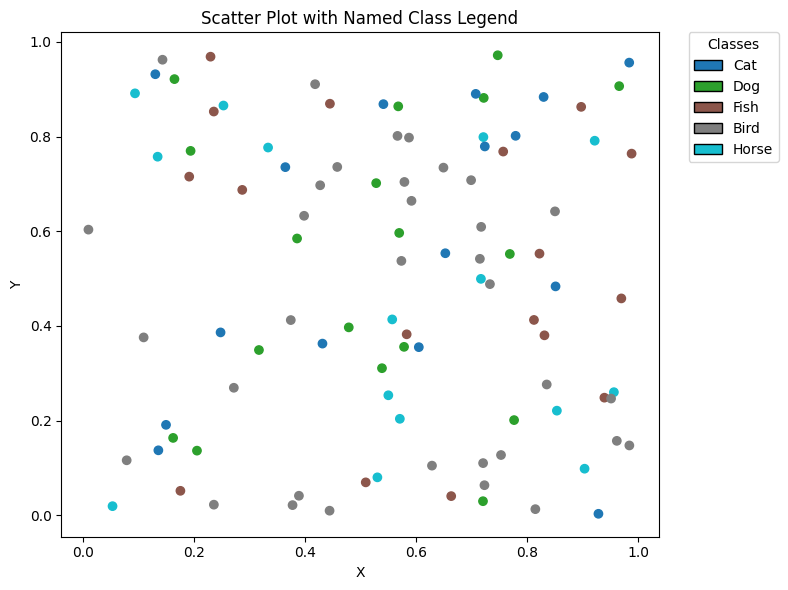

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sample data
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.randint(0, 5, size=100)

# Class labels for integers 0 to 4
class_labels = {
    0: 'Cat',
    1: 'Dog',
    2: 'Fish',
    3: 'Bird',
    4: 'Horse'
}

# Create colormap
cmap = plt.cm.get_cmap('tab10', 5)

# Plot scatter
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap=cmap)

# Custom legend using class labels
legend_elements = [
    Patch(facecolor=cmap(i), edgecolor='black', label=class_labels[i]) for i in range(5)
]

# Add legend outside top-right
plt.legend(
    handles=legend_elements,
    title="Classes",
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0.
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with Named Class Legend")

plt.tight_layout()
plt.show()


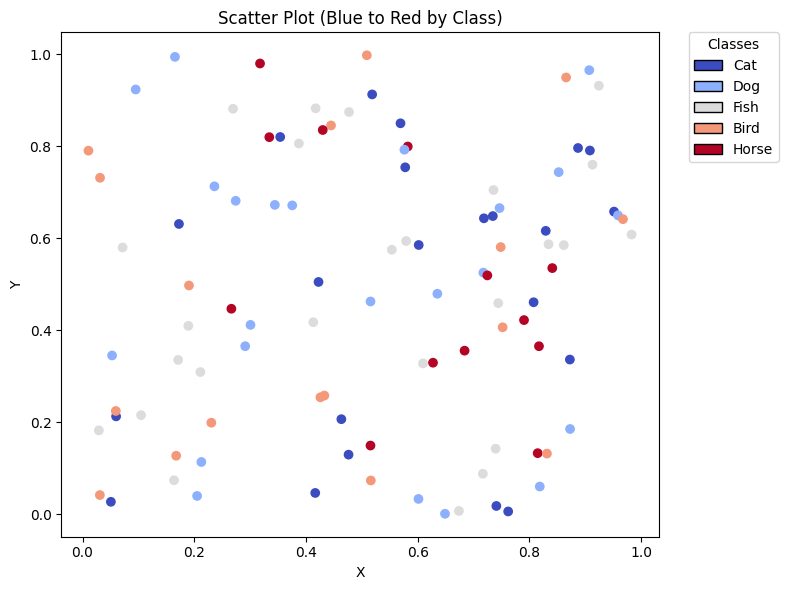

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sample data
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.randint(0, 5, size=100)

# Class names for each integer
class_labels = {
    0: 'Cat',
    1: 'Dog',
    2: 'Fish',
    3: 'Bird',
    4: 'Horse'
}

# Use a sequential colormap (blue to red)
cmap = plt.cm.coolwarm  # Or plt.cm.jet, plt.cm.RdYlBu_r

# Normalize class indices to [0, 1] for colormap
norm = plt.Normalize(0, 4)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap=cmap, norm=norm)

# Custom legend with matching colors
legend_elements = [
    Patch(facecolor=cmap(norm(i)), edgecolor='black', label=class_labels[i]) for i in range(5)
]

# Place legend outside top-right
plt.legend(
    handles=legend_elements,
    title="Classes",
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0.
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot (Blue to Red by Class)")

plt.tight_layout()
plt.show()


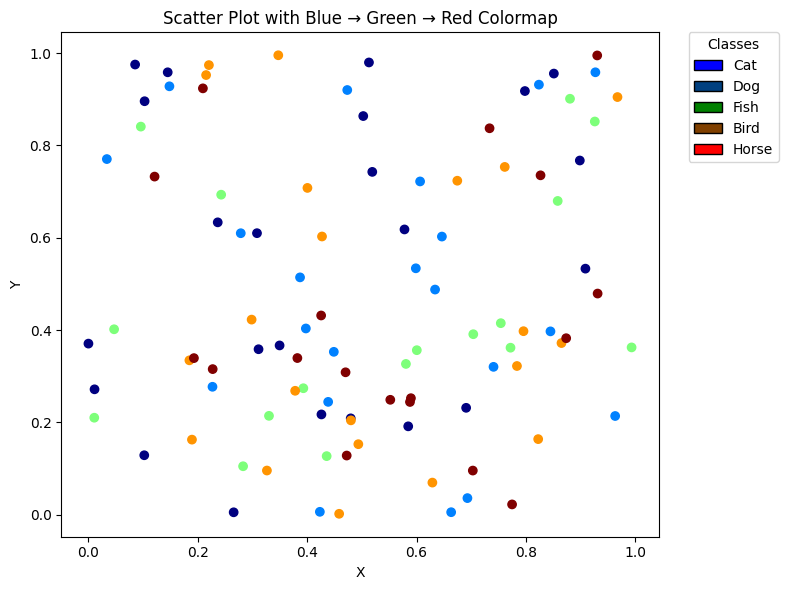

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

# Sample data
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.randint(0, 5, size=100)

# Class labels
class_labels = {
    0: 'Cat',
    1: 'Dog',
    2: 'Fish',
    3: 'Bird',
    4: 'Horse'
}

# Create a custom colormap: blue → green → red
custom_cmap = LinearSegmentedColormap.from_list(
    'blue_green_red',
    ['blue', 'green', 'red'],
    N=5  # 5 discrete colors
)

# Normalize the integer classes
norm = plt.Normalize(0, 4)

# Plot scatter
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap='jet', norm=norm)

# Legend using the same colormap
legend_elements = [
    Patch(facecolor=custom_cmap(norm(i)), edgecolor='black', label=class_labels[i]) for i in range(5)
]

# Put the legend outside top-right
plt.legend(
    handles=legend_elements,
    title="Classes",
    loc='upper left',
    bbox_to_anchor=(1.05, 1),
    borderaxespad=0.
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with Blue → Green → Red Colormap")

plt.tight_layout()
plt.show()


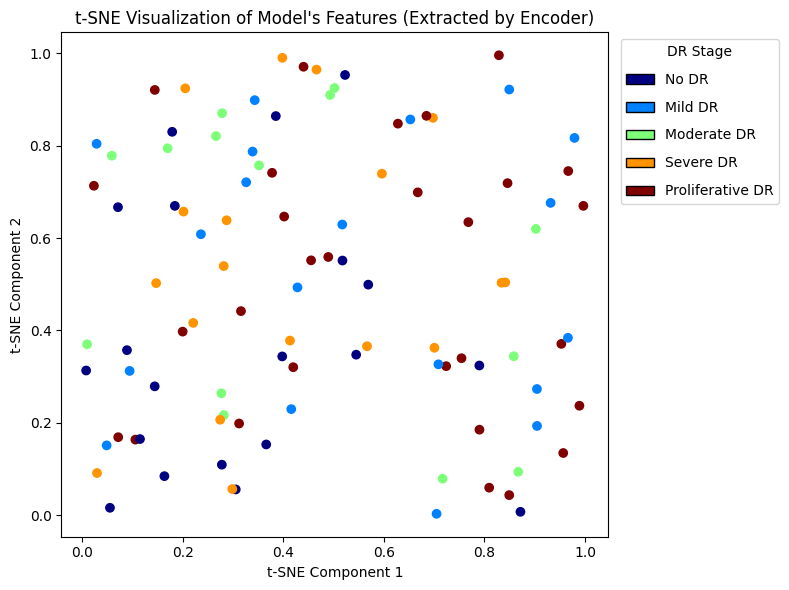

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Class labels
class_labels = {
    0: 'No DR',
    1: 'Mild DR',
    2: 'Moderate DR',
    3: 'Severe DR',
    4: 'Proliferative DR'
}

cmap = plt.cm.jet
norm = plt.Normalize(0, 4)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=colors, cmap=cmap, norm=norm)

legend_elements = [
    Patch(facecolor=cmap(norm(i)), edgecolor='black', label=class_labels[i]) for i in range(5)
]

# Add legend outside top-right
plt.legend(
    handles=legend_elements,
    title="DR Stage",
    loc='upper left',
    bbox_to_anchor=(1.01, 1),
    labelspacing=1,      
    borderaxespad=0.5,    
)

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Model's Features (Extracted by Encoder)")

plt.tight_layout()
plt.show()


In [ ]:

    f1 = MulticlassF1Score(num_classes=num_classes, average='macro')  # 'macro', 'micro', or 'weighted'

    f1_results = {'f1_class': 0, 'f1_reg': 0, 'f1_ord': 0}

    f1_results["f1_class"] = f1(y_pred_class, y)
    f1_results["f1_reg"] = f1(y_pred_reg, y)
    f1_results['f1_ord'] =  f1(y_pred_ord, y)

    return f1_results


In [13]:
import torch
from torchmetrics.classification import MulticlassF1Score
f1 = MulticlassF1Score(num_classes=3, average='macro')  # 'macro', 'micro', or 'weighted'
targets = torch.tensor([0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0])
preds = torch.tensor([0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1])
f1(preds, targets)

tensor(0.5397)

In [10]:
import torch
t = torch.tensor([1, 2])
l = t
for i in l:
    print(i)


tensor(1)
tensor(2)


In [2]:
s = None
if s is None:
    print(1)

1


In [4]:
import torch
from torch import tensor

In [5]:
t = [tensor(0), tensor(0), tensor(0.)]

In [6]:
t

[tensor(0), tensor(0), tensor(0.)]

In [7]:
t[0].item()

0

In [8]:
def reg_classify(x, device):
    bins = torch.tensor([0.5, 1.5, 2.5, 3.5]).to(device)  # Class boundaries
    # Classify using bucketize
    classified = torch.bucketize(x, bins, right=False)  # right=False ensures correct bin placement
    return classified

In [9]:
t = torch.tensor([[2.7790],
        [3.3410],
        [0.7877],
        [1.1802],
        [0.7877],
        [0.7877]])

In [10]:
reg_classify(t, device=torch.device('cpu'))

tensor([[3],
        [3],
        [1],
        [1],
        [1],
        [1]])

In [11]:
out = tensor([
        [1.6567],
        [3.2548],
        [0.7049],
        [1.5457],
        [0.7049],
        [0.7049],
        [0.7049],
        [0.7049],
        [0.7049]])

In [12]:
y_pred = tensor([
        [2],
        [3],
        [1],
        [2],
        [1],
        [1],
        [1],
        [1],
        [1]])

In [13]:
y = tensor([2, 2, 2, 3, 1, 2, 4, 4, 2])

In [15]:
acc = 0
acc += (y_pred.squeeze(dim=1) == y).sum().item()/len(y)
print('acc is: ', acc)

acc is:  0.2222222222222222


In [22]:
(y_pred == y)

tensor([[ True,  True,  True, False, False,  True, False, False,  True],
        [False, False, False,  True, False, False, False, False, False],
        [False, False, False, False,  True, False, False, False, False],
        [ True,  True,  True, False, False,  True, False, False,  True],
        [False, False, False, False,  True, False, False, False, False],
        [False, False, False, False,  True, False, False, False, False],
        [False, False, False, False,  True, False, False, False, False],
        [False, False, False, False,  True, False, False, False, False],
        [False, False, False, False,  True, False, False, False, False]])

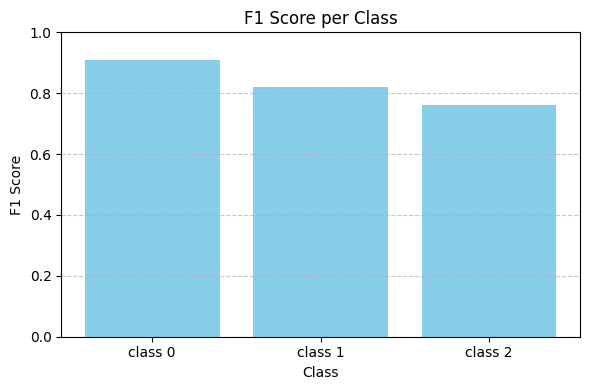

In [16]:
import matplotlib.pyplot as plt
import torch

# Example F1 scores
f1_scores = torch.tensor([0.91, 0.82, 0.76])  # or use f1(preds, targets)
class_labels = ['class 0', 'class 1', 'class 2']  # adjust to your classes

plt.figure(figsize=(6, 4))
plt.bar(class_labels, f1_scores.numpy(), color='skyblue')
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("F1 Score per Class")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

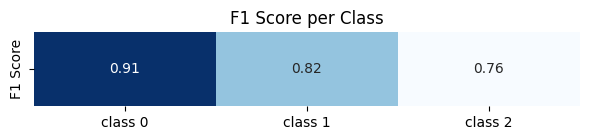

In [20]:
import seaborn as sns
import numpy as np

# Convert to 2D array for heatmap
f1_matrix = torch.tensor([0.91, 0.82, 0.76]).unsqueeze(0)  # shape [1, num_classes]
class_labels = ['class 0', 'class 1', 'class 2']

plt.figure(figsize=(6, 1.5))
sns.heatmap(f1_matrix.numpy(), annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_labels, yticklabels=['F1 Score'], cbar=False)
plt.title("F1 Score per Class")
plt.tight_layout()
plt.show()


In [21]:
from torchmetrics.classification import MulticlassConfusionMatrix

num_classes = 3  # set your number of classes
confmat = MulticlassConfusionMatrix(num_classes=num_classes)

# Example predictions and targets
preds = torch.tensor([0, 1, 2, 1, 0])
target = torch.tensor([0, 2, 1, 1, 0])

# Compute confusion matrix
cm = confmat(preds, target)  # shape: [num_classes, num_classes]

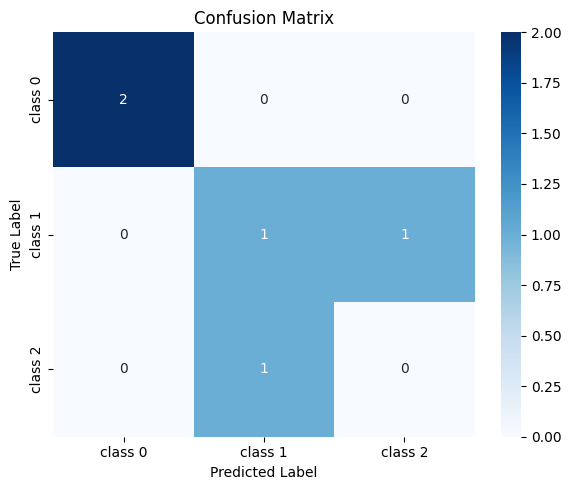

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: convert to numpy
cm_np = cm.numpy()
class_labels = ['class 0', 'class 1', 'class 2']  # adjust as needed

plt.figure(figsize=(6, 5))
sns.heatmap(cm_np, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [32]:
from torch import nn
device = 'cpu'
loss_fn = nn.BCEWithLogitsLoss().to(device)

ord_out = torch.tensor([[ 2.3697e-01,  3.5053e-01,  4.0503e-01,  7.2804e-02, -5.2522e-01]])
y_cumulative =  torch.tensor([[1., 0., 0., 0., 0.]])

ord_out = torch.tensor([[ 2.3697e-01], [3.5053e-01]])
y_cumulative =  torch.tensor([[1.], [0]])

In [33]:
loss = loss_fn(ord_out, y_cumulative)
loss

tensor(0.7327)

In [30]:
loss_fn = nn.BCELoss()
loss = loss_fn(ord_out, y_cumulative)
loss

tensor(1.4398)

In [31]:
manual_loss = -torch.log(torch.tensor(0.23697))
manual_loss

tensor(1.4398)

In [3]:
from torch.cuda.amp import autocast, GradScaler


In [3]:
import torch

t = torch.randn(10, 100)

class MyModule(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = torch.nn.Linear(100, 10)

    def forward(self, x):
        return torch.nn.functional.relu(self.lin(x))

mod = MyModule()
mod = torch.compile(mod)
print(mod(t))
## or:
# opt_mod = torch.compile(mod)
# print(opt_mod(t))

BackendCompilerFailed: backend='inductor' raised:
SyntaxError: invalid syntax (<string>, line 1)

Set TORCH_LOGS="+dynamo" and TORCHDYNAMO_VERBOSE=1 for more information


You can suppress this exception and fall back to eager by setting:
    import torch._dynamo
    torch._dynamo.config.suppress_errors = True
